In [1]:
import torch
from kbgen.utils.metrics import WeightedLoss
from matplotlib import pyplot as plt
import tqdm
from functools import partial
import numpy as np

In [14]:
num_terms = 4
batch_size = 10
dynamic_weight_loss = WeightedLoss(num_terms, train=False)

def train(loss_func, optim):
    params = torch.arange(num_terms, dtype=torch.float32, requires_grad=True)
    optim = optim([params])
    values = [params.tolist()]
    loss_list = [params.exp().tolist()]
    print(values)
    for i in (pbar:=tqdm.trange(1000)):
        optim.zero_grad()
        losses = torch.rand(batch_size, num_terms) + params.view(1, -1).exp()
        loss = loss_func(losses)
        loss.backward()
        optim.step()
        with torch.no_grad():
            values.append(params.tolist())
            loss_list.append(params.exp().tolist())
        pbar.set_description_str(f"Loss: {loss.item():^6.3f}")
     
    values = np.array(loss_list) 
    for v in values.T:
        plt.plot(v)  
    plt.xscale("log")
    plt.yscale("log")

[[0.0, 1.0, 2.0, 3.0]]


Loss: 0.854 :  10%|█         | 102/1000 [00:00<00:00, 1019.78it/s]

Loss: 0.850 : 100%|██████████| 1000/1000 [00:01<00:00, 989.66it/s]


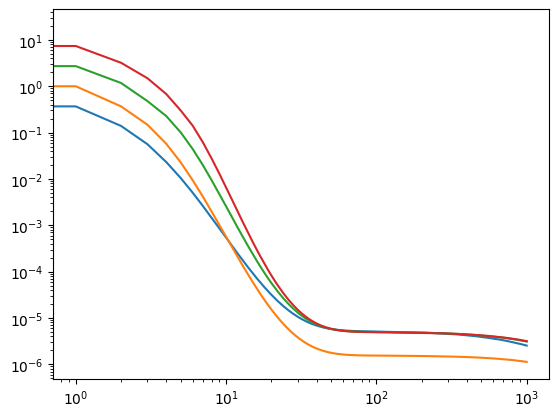

In [15]:
train(dynamic_weight_loss, partial(torch.optim.Adam, lr=1))

[[0.0, 1.0, 2.0, 3.0]]


Loss: 0.496 :  13%|█▎        | 128/1000 [00:00<00:00, 1270.32it/s]

Loss: 0.473 : 100%|██████████| 1000/1000 [00:00<00:00, 1184.42it/s]


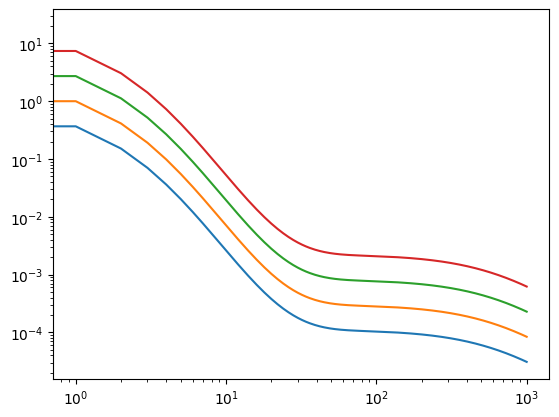

In [16]:
train(lambda x: x.mean(), partial(torch.optim.Adam, lr=1))

[[0.0, 1.0, 2.0, 3.0]]


Loss: 0.536 :  13%|█▎        | 132/1000 [00:00<00:00, 1319.69it/s]

Loss: 0.479 : 100%|██████████| 1000/1000 [00:00<00:00, 1287.99it/s]


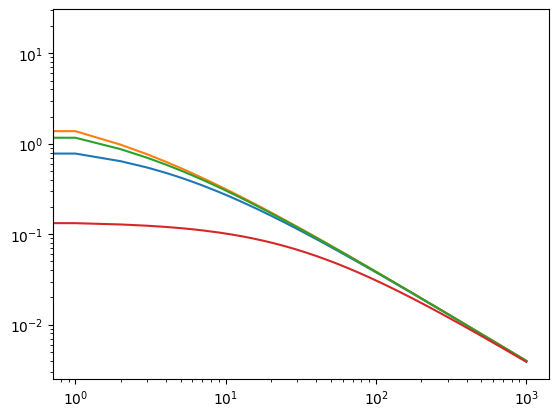

In [17]:
train(lambda x: x.mean(), partial(torch.optim.SGD, lr=1))

[[0.0, 1.0, 2.0, 3.0]]


Loss: 0.980 :  11%|█         | 107/1000 [00:00<00:00, 1063.85it/s]

Loss: 0.943 : 100%|██████████| 1000/1000 [00:00<00:00, 1056.57it/s]


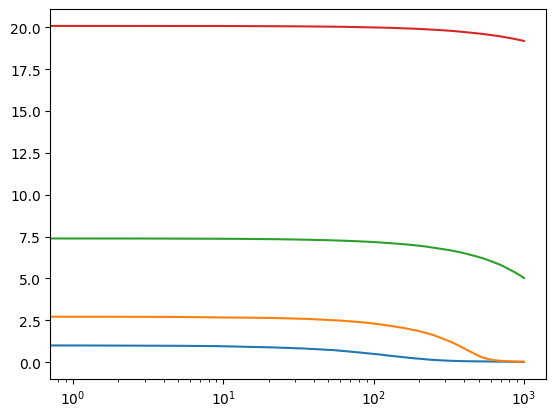

In [13]:
train(dynamic_weight_loss, partial(torch.optim.SGD, lr=1))